<h1>Sparks Foundation</h1>
<h3> Graduate Rotational Internship Program </h3>
 <h2>Data Science & Analytics Internship Task 1</h2>
<h2>Notebook by Damilola Ayodele </h2>

<h3>Tasks<h3>
1. Using linear regression, predict the percentage score of a student based on the number of study hours

2. What will be predicted score if a student studies for 9.25 hrs/ day?

Firstly, importing libraries needed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/internship-task-for-beginners/Internship task 1.csv


#   Secondly, Import the dataset

In [2]:
df = pd.read_csv("../input/internship-task-for-beginners/Internship task 1.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

After importing the dataset, the graphs below help to show if there is a relationship between the two features present in the dataset

<AxesSubplot:title={'center':'A graph of hours to scores'}, xlabel='Hours', ylabel='Scores'>

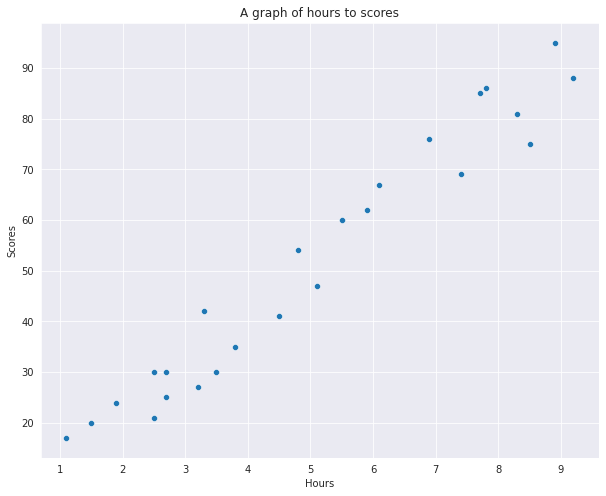

In [5]:
plt.figure(figsize = (10, 8))
plt.title("A graph of hours to scores")
sns.scatterplot(x = df["Hours"], y = df["Scores"])

The graph above shows that there is a positive linear relationship between the two features and the graph below shows the regression line

<AxesSubplot:title={'center':'A graph of hours to scores'}, xlabel='Hours', ylabel='Scores'>

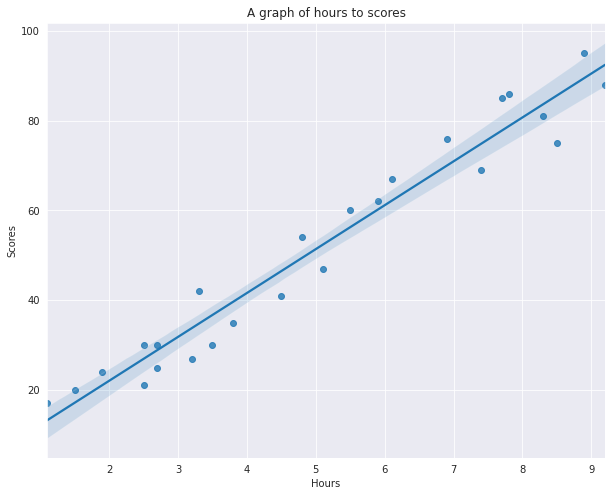

In [6]:
plt.figure(figsize = (10, 8))
plt.title("A graph of hours to scores")
sns.regplot(x = df["Hours"], y = df["Scores"])

# Building the model
First there is a need to assign the features to be used for training and testing the model. Thus X is assigned 'Hours' and y is assigned the target to be predicted 'Scores'

In [8]:
X = df.drop("Scores", axis = 1)
y = df["Scores"]

The we split the dataset into two, one for training the model and the other to test our model. The data is divided in a ratio of 70:30. 30% for training and 70% for testing the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=1)

<h3> Training the Model </h3>
After splitting the data into training and testing sets, it is the time to train our algorithm.

In [10]:
L = LinearRegression()

In [11]:
L.fit(X_train, y_train)

LinearRegression()

In [12]:
predict = L.predict(X_test)

What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
hour = np.array([9.25, 4])
val = hour.reshape(-1,1)
pred_T = L.predict(val)
print("the number of hours used to study: {}".format(hour[0]))
print("the predicted percentage score is: {}".format(pred_T[0]))

the number of hours used to study: 9.25
the predicted percentage score is: 94.78722212956563


In [32]:
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
df_1

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


<h3> Evaluating the model </h3>
Mean Absolute Error is used to evaluate how well the model has done

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predict))

Mean Absolute Error: 7.169048271425507
